In [1]:
import numpy as np
import ndio.remote.neurodata as nd
from datetime import datetime
import ndio
print ndio.version
oo = nd()

token = 'bock11'
channel = 'image'

startTime = datetime.now()

0.1.13


In [2]:
# Get image properties

res = 7  #6 might be good
slice_stride = 11  # TODO: this is empirically determined right now - 6 might be good

image_size = oo.get_proj_info(token)['dataset']['imagesize'][str(res)]
image_offset = oo.get_proj_info(token)['dataset']['offset'][str(res)]
image_res = oo.get_proj_info(token)['dataset']['voxelres'][str(res)]
print image_size
print image_offset
total_voxels = (image_size[0]-image_offset[0])*(image_size[1]-image_offset[1])*(image_size[2]-image_offset[2])

#image_res in z dim should be 1
pixel_dim = image_res[0]*0.004*image_res[1]*0.004*.045
total_volume = total_voxels*pixel_dim

print 'total volume: ' + str(round(total_volume)) + ' um^3'

# Downsample exploration

print image_res[0]*0.004
print image_res[1]*0.004
print 0.045*slice_stride

[1058, 936, 4156]
[0, 0, 2917]
total volume: 14473890.0 um^3
0.512
0.512
0.495


In [3]:
imout = np.zeros([image_size[0]-image_offset[0],image_size[1]-image_offset[1], 
                  len(range(image_offset[2],image_size[2],slice_stride))],dtype='uint8')
c = 0
for x in range(image_offset[2],image_size[2],slice_stride):
    print str(x).zfill(4), 
    temp = oo.get_volume(token, channel, image_offset[0], image_size[0], image_offset[1], 
                         image_size[1], x, x + 1, resolution=res)
    imout[:,:,c] = temp.cutout[:,:,0]
    c += 1

2917 2928 2939 2950 2961 2972 2983 2994 3005 3016 3027 3038 3049 3060 3071 3082 3093 3104 3115 3126 3137 3148 3159 3170 3181 3192 3203 3214 3225 3236 3247 3258 3269 3280 3291 3302 3313 3324 3335 3346 3357 3368 3379 3390 3401 3412 3423 3434 3445 3456 3467 3478 3489 3500 3511 3522 3533 3544 3555 3566 3577 3588 3599 3610 3621 3632 3643 3654 3665 3676 3687 3698 3709 3720 3731 3742 3753 3764 3775 3786 3797 3808 3819 3830 3841 3852 3863 3874 3885 3896 3907 3918 3929 3940 3951 3962 3973 3984 3995 4006 4017 4028 4039 4050 4061 4072 4083 4094 4105 4116 4127 4138 4149


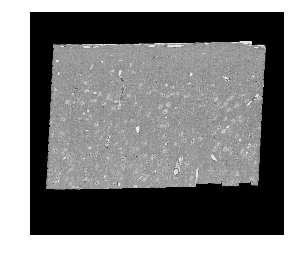

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.imshow(imout[:,:,10].T, cmap='gray')
plt.axis("off")
plt.savefig('testbock.jpg',  dpi = 600)

In [5]:
import ndio.convert.nifti as cnifti
print np.shape(imout)
cnifti.export_nifti('testout.nii',imout)

print str(datetime.now()-startTime)

# mana annotation protocol:  http://docs.neurodata.io/nddocs/ndparse/mana.html

0:01:58.931712
